In [7]:
import pandas as pd

In [11]:
df = pd.read_csv(r'Desktop\Classes\ExcelR\Assignments\Assignment - 20\Timeseries\Timeseries\exchange_rate.csv')


In [15]:
# Display the first few rows and columns of the dataset and check for any missing values
df.head(), df.info(), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


(               date  Ex_rate
 0  01-01-1990 00:00   0.7855
 1  02-01-1990 00:00   0.7818
 2  03-01-1990 00:00   0.7867
 3  04-01-1990 00:00   0.7860
 4  05-01-1990 00:00   0.7849,
 None,
 date       0
 Ex_rate    0
 dtype: int64)

In [17]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Set 'date' as the index
df.set_index('date', inplace=True)

# Check the changes
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB
None
            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849


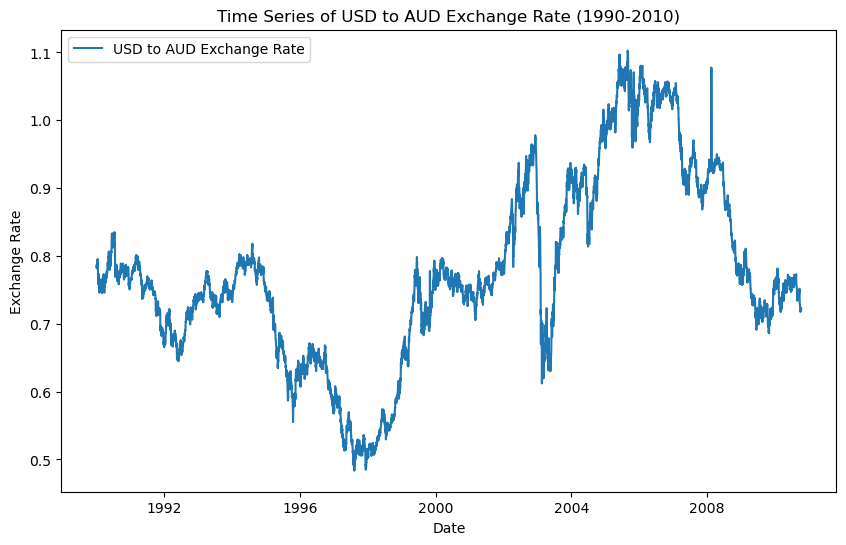

In [21]:
import matplotlib.pyplot as plt

# Plot the exchange rate time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='USD to AUD Exchange Rate')
plt.title('Time Series of USD to AUD Exchange Rate (1990-2010)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

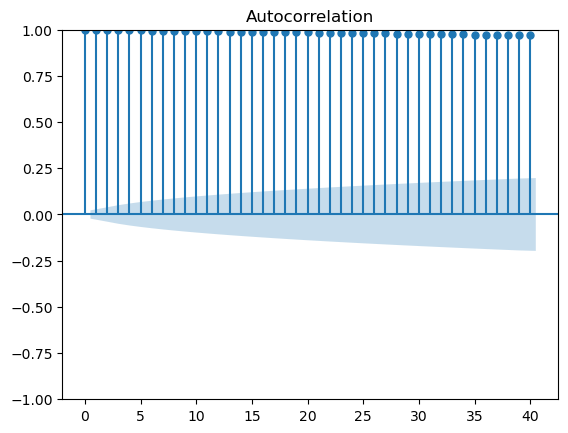

<Figure size 1000x600 with 0 Axes>

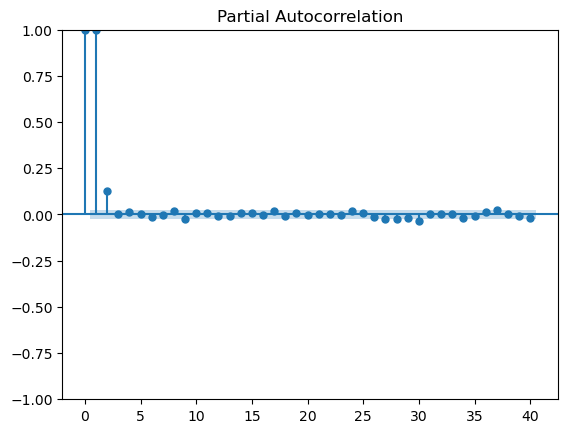

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to identify p, d, q parameters
plt.figure(figsize=(10, 6))
plot_acf(df['Ex_rate'], lags=40)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(df['Ex_rate'], lags=40)
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model (p, d, q should be determined based on ACF/PACF analysis)
p, d, q = 1, 1, 1  # Example values, adjust based on ACF/PACF plots
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = model_arima.fit()

# Print model summary
print(arima_result.summary())


E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 24 Sep 2024   AIC                         -56102.322
Time:                        13:40:29   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

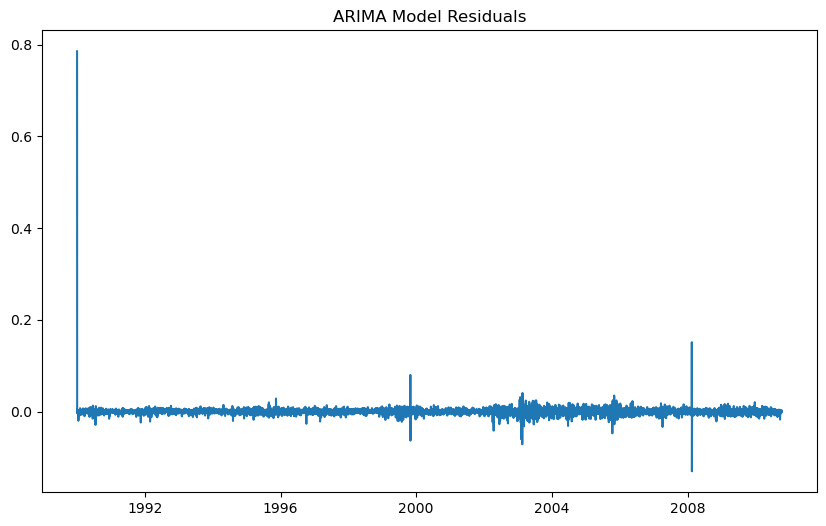

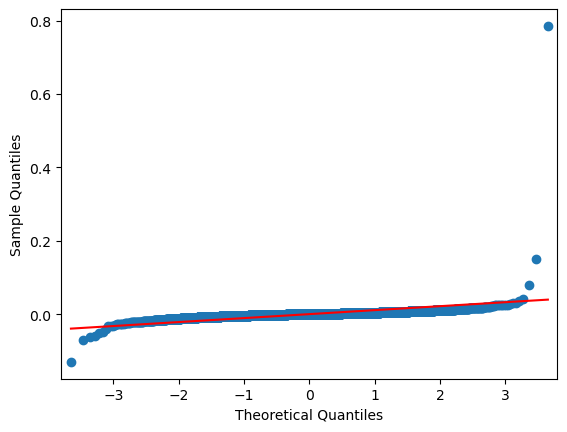

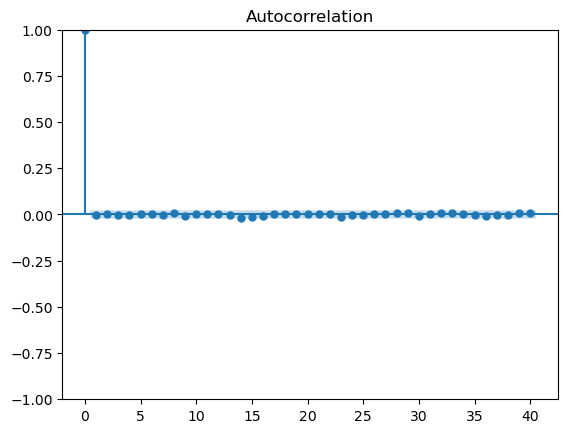

In [27]:
# Residual analysis
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.show()

# QQ-plot for residuals
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.show()

# ACF of residuals to check for autocorrelation
plot_acf(residuals, lags=40)
plt.show()


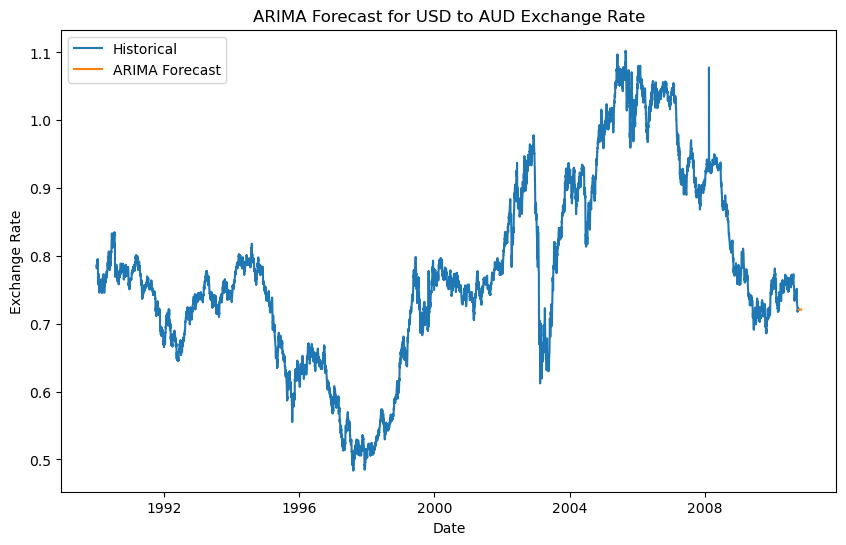

In [29]:
# Forecast future values
forecast_steps = 30  # Forecast for the next 30 days
forecast_arima = arima_result.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast for USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit an Exponential Smoothing model
# We will use Holt's Linear method here (trend only, no seasonality)
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None, seasonal_periods=None)
es_result = model_es.fit()

# Print model summary
print(es_result.summary())


E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Tue, 24 Sep 2024
Box-Cox:                          False   Time:                         13:41:14
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700401                alpha                 True
smoothing_trend             0.0000

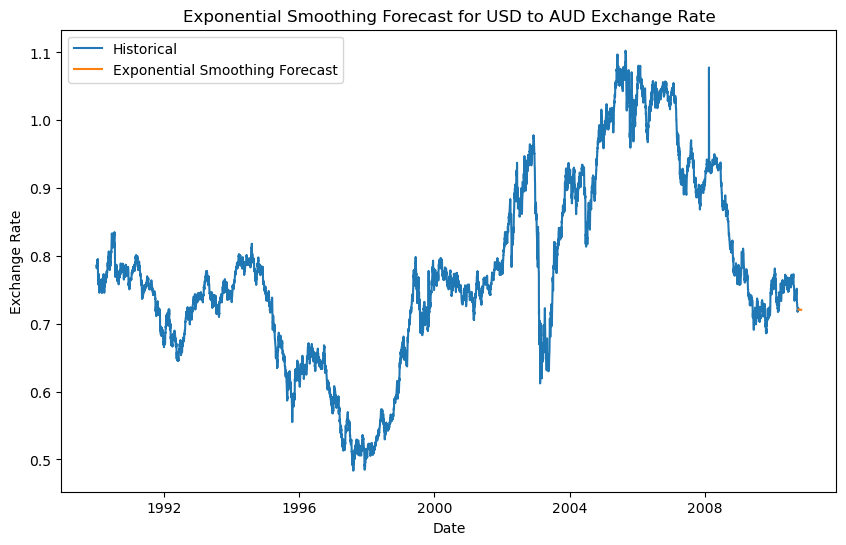

In [33]:
# Forecast future values using Exponential Smoothing
forecast_es = es_result.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast_es, label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast for USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the actual data for the forecast period (last 'forecast_steps' days from the dataset)
actual = df['Ex_rate'][-forecast_steps:]

# Compute MAE, RMSE, and MAPE for ARIMA
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))
mape_arima = np.mean(np.abs((actual - forecast_arima) / actual)) * 100

# Compute MAE, RMSE, and MAPE for Exponential Smoothing
mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = np.sqrt(mean_squared_error(actual, forecast_es))
mape_es = np.mean(np.abs((actual - forecast_es) / actual)) * 100

# Print the error metrics
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}%')
print(f'Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}%')


ARIMA - MAE: 0.012724006489318252, RMSE: 0.016982710912774826, MAPE: nan%
Exponential Smoothing - MAE: 0.012755742909953578, RMSE: 0.01700521798187411, MAPE: nan%
